# Simulation et optimisation du placement d'une ville : Traîtement des résultats

### Importation des données et des librairies

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import json
plt.rcParams['figure.dpi'] = 200

file1 = open("data/map1.json", "r")
map1 = json.load(file1)
file1.close()
#file2 = open("data/map2.json", "r")
#map2 = json.load(file2)
#file2.close()

In [75]:
print(map1[0]["coos"])

[7.72478666666667, 48.59658416666668]


## Désérialisation des données

In [76]:
def convert(map : list) -> list:
    newmap = []
    for b in map:
        bat = {}
        bat["area"] = b["area"]
        bat["type"] = b["type"]
        bat["coos"] = b["coos"]
        bat["coox"] = b["coos"][0]
        bat["cooy"] = b["coos"][1]
        newmap.append(bat)
    return newmap

## Affichage

In [77]:
type_to_c = {0:'#ed1c24', 1:'#6ABE30', 2:'#5B6EE1',
                3:'#5FCDE4', 4:'#76428A', 5:'#FBF236', 
                6:'#DF7126', 7:'#D77BBA', 8:'#544406',
                9:'#424258'} 

In [78]:
def affichage(map):
        limE = max([bat["coox"] for bat in map])
        limW = min([bat["coox"] for bat in map])
        limN = max([bat["cooy"] for bat in map])
        limS = min([bat["cooy"] for bat in map])
        color_list = [ type_to_c[bat["type"]] for bat in map ]
        size_list = [ (1/10000) * bat["area"] for bat in map ]
        coos_listx = [ bat["coox"] for bat in map ]
        coos_listy = [ bat["cooy"] for bat in map ]
        plt.style.use('dark_background')
        fig, axes = plt.subplots(1)
        ax_ville = axes
        ax_ville.set_box_aspect(1)
        dico = {0:"Commerces", 1:"habitat", 2:"santé", 3:"securité",
                4:"emploi", 5:"moralité", 6:"fete", 7:"physique",
                8:"gestion", 9:"routes"}
        ax_ville.legend(loc="center left", bbox_transform=fig.transFigure)
        box = ax_ville.get_position()
        box = ax_ville.get_position()
        ax_ville.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
        bbox = (limW, limE, limS, limN)
        ax_ville.scatter(coos_listx, coos_listy, c= color_list, s= size_list)
        for t in dico:
            ax_ville.scatter([], [], c=type_to_c[t], label=dico[t])
        ax_ville.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=4)
        plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


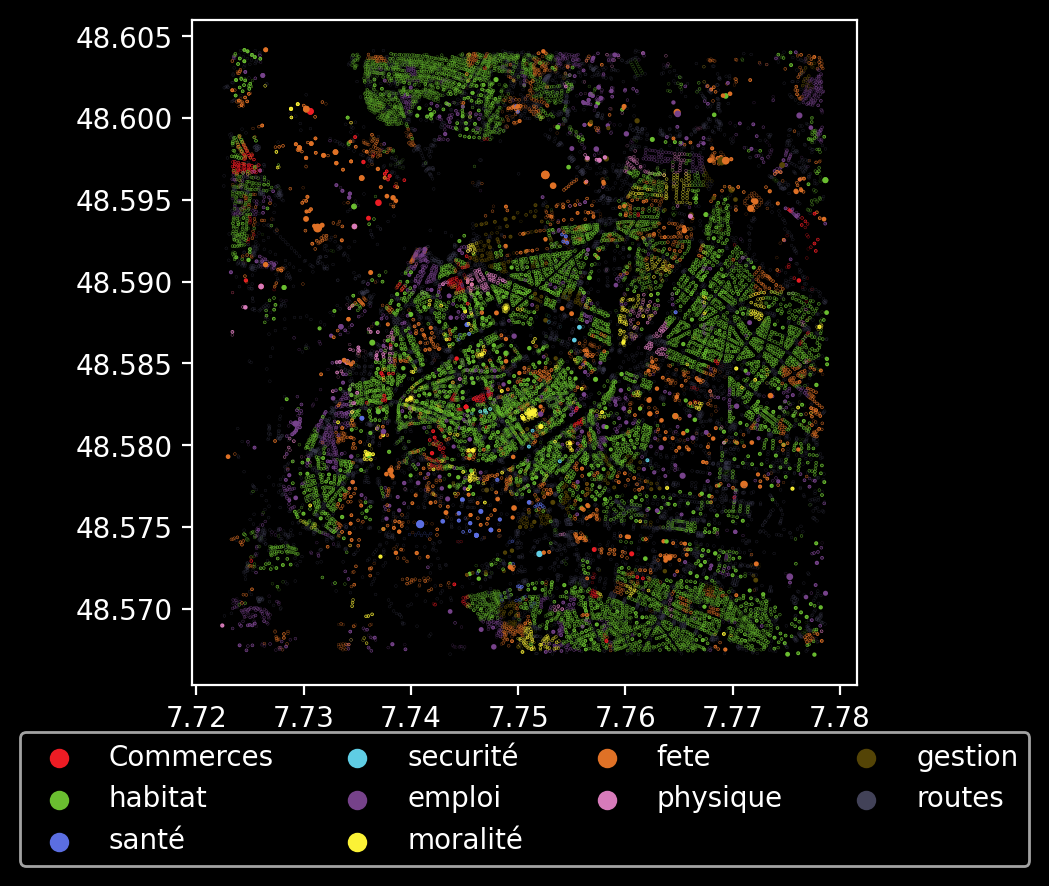

In [79]:
maptest = convert(map1)
affichage(maptest)

### Tri des bâtiments

In [80]:
def affiche_seulement(map, id_bat):
    newmap = [bat for bat in map if bat["type"] == id_bat]
    return newmap


### Test : Affiche uniquement les maisons

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


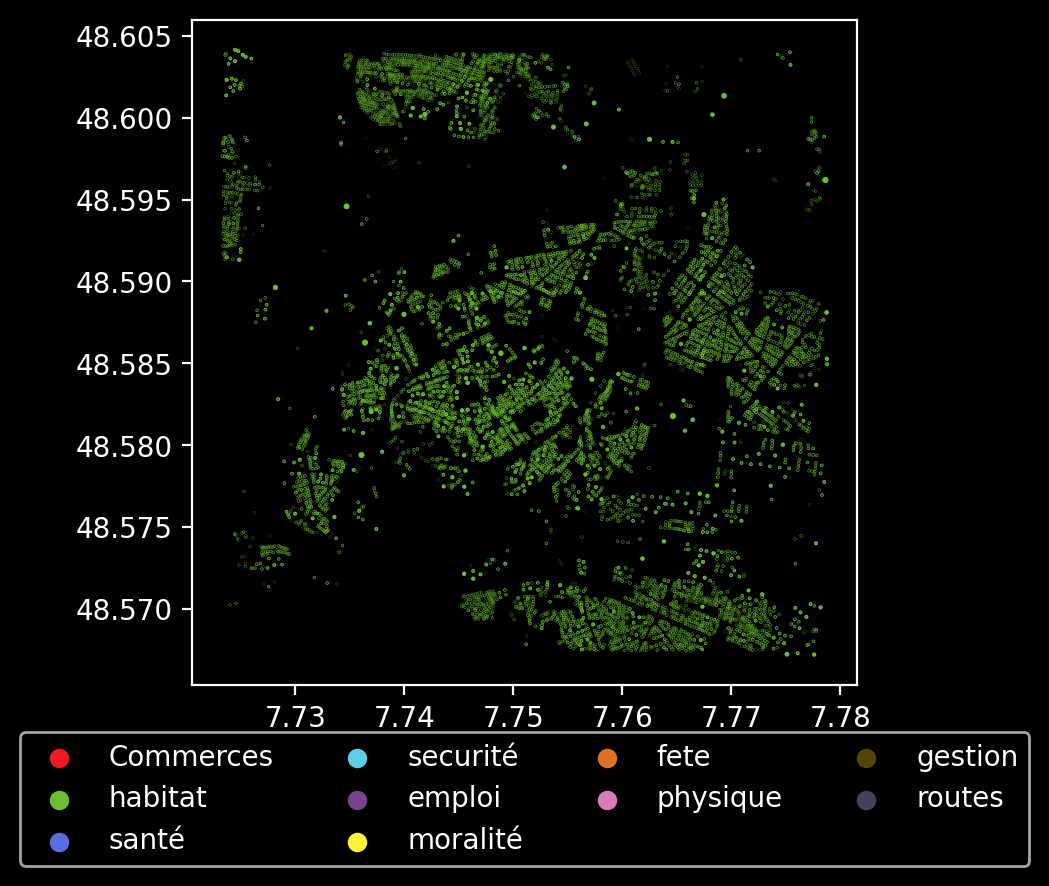

In [81]:
map_ville = affiche_seulement(maptest, 1)
affichage(map_ville)